<a href="https://colab.research.google.com/github/Afina78/Afina78/blob/main/HW_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [ ]:
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_values_percent

,0
id,0.000000
name,0.000000
nationality,0.000000
sex,0.000000
dob,0.008667
height,2.860114
weight,5.711562
sport,0.000000
gold,0.000000
silver,0.000000


Имеем пропуски по весу, росту и дате рождения, дата рождения нас не сильно интересует в данной работе, рост и вес заполним средними значениями по половому признаку и спорту.

Зафиксируем статистики

In [ ]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


Заполним пропуски

In [ ]:
# с группировкой по спорту и полу, средними значениями, по весу будем округлять до целого
df['height'] = df.groupby(['sport', 'sex'])['height'].transform(lambda x: x.fillna(x.mean()))
df['weight'] = df.groupby(['sport', 'sex'])['weight'].transform(lambda x: x.fillna(x.mean()).round())

In [ ]:
# так как после этого у нас остались значения по весу частично незаполненными, дозаполним средними глобально
df['weight'] = df['weight'].fillna(df['weight'].mean().round())

Посмотрим на сколько изменились статистики после заполнения пропусков

In [ ]:
df.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11538.000000,11538.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766206,72.020541,0.057722,0.056769,0.061016
std,2.908648e+08,0.111611,15.789435,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,80.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


Сравним статистики по росту и весу, данные изменились незначительно, оставляем текущее заполнение пропусков.

Целевая переменная - пол. Метрики - национальность, вес, рост и вид спорта.

Оставим в датасете только необходимые метрики и целевую переменную.

In [ ]:
df_clean = df.drop(['id',	'name',	'dob',	'gold',	'silver',	'bronze'], axis = 1)
df_clean.head()

,nationality,sex,height,weight,sport
0,ESP,male,1.72,64.0,athletics
1,KOR,female,1.68,56.0,fencing
2,CAN,male,1.98,79.0,athletics
3,MDA,male,1.83,80.0,taekwondo
4,NZL,male,1.81,71.0,cycling


Посмотрим как распределены данные в целевой переменной между классами

In [ ]:
print(df_clean['sex'].value_counts())

sex
male      6333
female    5205
Name: count, dtype: int64


Данные распределены  в пропорции 55% / 45%, классы достаточно сбалансированы.

Закодируем данные с помощью OHE, используем pipeline, разделим выборку на test/train, обучим модель, посчитаем матрицу ошибок и матрицу несоответствий

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Определение признаков и целевой переменной
X = df_clean.drop('sex', axis=1)
y = df_clean['sex']

In [ ]:
# Определение этапов предобработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['height', 'weight']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['nationality', 'sport'])
    ])

In [ ]:
# Определение пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['height', 'weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nationality', 'sport'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# Предсказание на тестовом множестве
y_pred = pipeline.predict(X_test)

In [ ]:
class_labels = pipeline.named_steps['classifier'].classes_
print(f'Class labels: {class_labels}')

Class labels: ['female' 'male']


In [ ]:
# Оценка модели
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 876  161]
 [ 210 1061]]

Classification Report:
              precision    recall  f1-score   support

      female       0.81      0.84      0.83      1037
        male       0.87      0.83      0.85      1271

    accuracy                           0.84      2308
   macro avg       0.84      0.84      0.84      2308
weighted avg       0.84      0.84      0.84      2308



Матрица ошибок показывает что модель правильно предсказала 876 значений как женский пол и 161 одно значение как женский (на самом деле мужской), 210 значений предсказала как мужской (на самом деле женский) и 1061 значение правильно мужской.

В целом модель не плохо справилась точность для женщин составила 81%, для мужчин 87%, полнота для женщин 84%, для мужчин 83%

F1  мера так же имеет достаточно высокие показатели.

Точность предсказаний модели составила 84%

Построим ROC-кривую и вычислим ROC-AUC метрики для нашей модели

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Получим вероятности для положительного класса
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
llabel_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
# Построим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob, pos_label=1)

In [ ]:
# Вычислим ROC-AUC
roc_auc = roc_auc_score(y_test_encoded, y_prob)
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 0.9060


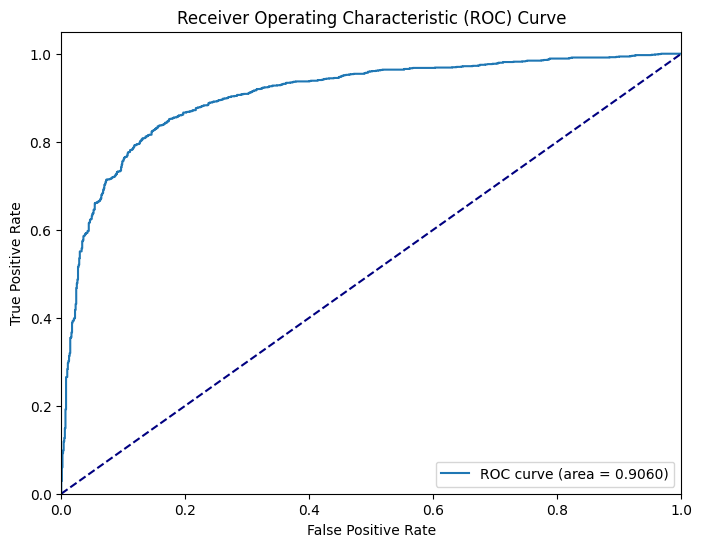

In [ ]:
# Построим график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Значение ROC-AUC Score: 0.9060 говорит о том, что модель хорошо отличает классы мужчин и женщин.

Проведем расчет метрик TPR, FPR без использования функций библиотеки, так же на их основе построим ROC-кривую и объединим два графика(на основе функций и расчетный)

In [ ]:
import numpy as np

In [ ]:
# Вероятности, полученные из модели
y_prob = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
# Преобразуем текстовые метки в числовые
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
# Ручной расчет TPR и FPR
thresholds_manual = np.sort(y_prob)
tpr_manual = []
fpr_manual = []

n_positive = np.sum(y_test_encoded == 1)
n_negative = np.sum(y_test_encoded == 0)

for threshold in thresholds_manual:
    y_pred_manual = (y_prob >= threshold).astype(int)

    tp = np.sum((y_pred_manual == 1) & (y_test_encoded == 1))
    fp = np.sum((y_pred_manual == 1) & (y_test_encoded == 0))
    fn = np.sum((y_pred_manual == 0) & (y_test_encoded == 1))
    tn = np.sum((y_pred_manual == 0) & (y_test_encoded == 0))

    tpr_manual.append(tp / (tp + fn))
    fpr_manual.append(fp / (fp + tn))

In [ ]:
# Использование roc_curve для сравнения
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test_encoded, y_prob)

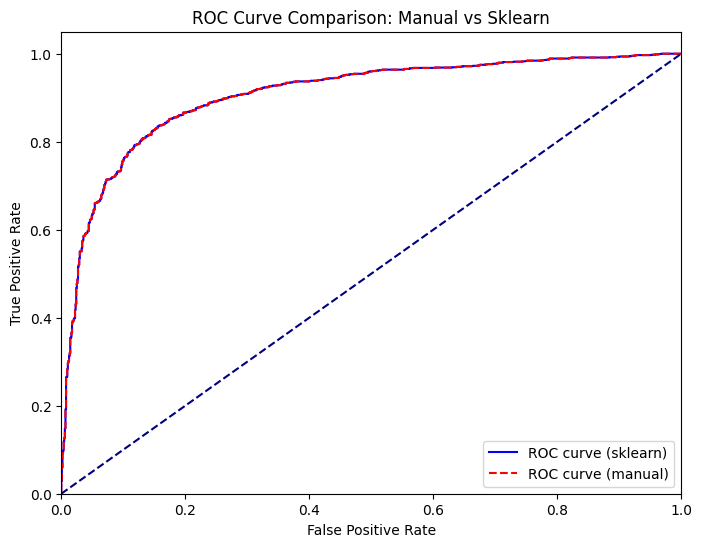

In [ ]:
# Построение ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, label='ROC curve (sklearn)', color='blue')
plt.plot(fpr_manual, tpr_manual, label='ROC curve (manual)', color='red', linestyle='--')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Manual vs Sklearn')
plt.legend(loc="lower right")
plt.show()

Обе ROC-кривые у нас совпали, следовательно наш расчет верен.

построим график Precision-Recall, используя метрики, посчитанные вручную

In [ ]:
# Зададим функцию для расчета AUC методом трапеций
def calculate_auc(x, y):
    auc_value = 0.0
    for i in range(1, len(x)):
        auc_value += (x[i] - x[i-1]) * (y[i] + y[i-1]) / 2
    return auc_value

In [ ]:
#Рассчитаем Precision и Recall вручную
precision_manual = []
recall_manual = []

for threshold in thresholds_manual:
    y_pred_manual = (y_prob >= threshold).astype(int)

    tp = np.sum((y_pred_manual == 1) & (y_test_encoded == 1))
    fp = np.sum((y_pred_manual == 1) & (y_test_encoded == 0))
    fn = np.sum((y_pred_manual == 0) & (y_test_encoded == 1))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    precision_manual.append(precision)
    recall_manual.append(recall)

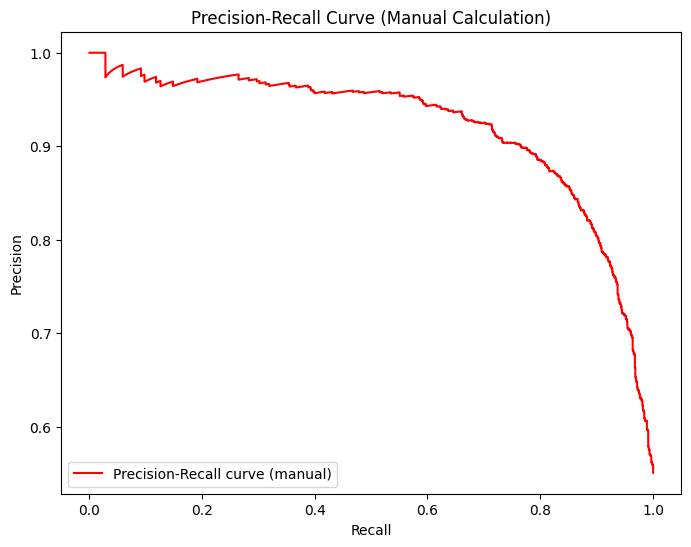

In [ ]:
# Построим PR-кривую
plt.figure(figsize=(8, 6))
plt.plot(recall_manual, precision_manual, label="Precision-Recall curve (manual)", color="red")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Manual Calculation)")
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Вычислим значение PR-AUC вручную
# Так как данные  были неосортированы результат был зо знаком -, поэтому применим сортировку
recall_manual_sorted, precision_manual_sorted = zip(*sorted(zip(recall_manual, precision_manual)))
pr_auc_manual = calculate_auc(recall_manual_sorted, precision_manual_sorted)
print(f'Precision-Recall AUC (manual): {pr_auc_manual:.4f}')

Precision-Recall AUC (manual): 0.9191


In [ ]:
# Вычислим значение ROC-AUC вручную
fpr_manual_sorted, tpr_manual_sorted = zip(*sorted(zip(fpr_manual, tpr_manual)))
roc_auc_manual = calculate_auc(fpr_manual_sorted, tpr_manual_sorted)
print(f'ROC AUC (manual): {roc_auc_manual:.4f}')

ROC AUC (manual): 0.9060


Вывод: на графиках площадь под кривой стремится к 1, следовательно модель дает хорошие результаты по предсказаниям. Исходя из расчитанных метрик, что при помощи встроенных функций, что вручную модель достаточно хорошо справляется с предсказанием пола спортсмена.

P.s. если ROC-кривая проходит ниже диагонали следовательно модель работает хуже случайного угадывания, она не способна различать предсказываемые классы.